In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./EGR_Cooler_data/material_train_data.csv')
test = pd.read_csv('./EGR_Cooler_data/material_test_data.csv')

In [8]:
X_train = train.drop(['op60_test'], axis = 1)
X_train.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height
0,199.996,100.002,50.001,100.000,49.997,59.997,30.000,50.003,29.996,30.000,49.996,29.999,30.002,80.000,40.003,30.001,79.998,39.999
1,200.002,100.000,49.998,99.999,50.002,60.000,29.999,49.994,29.999,30.007,50.000,29.998,30.000,79.997,40.002,30.000,79.995,40.000
2,199.998,100.000,49.998,100.003,50.003,59.998,29.995,50.002,30.000,30.003,50.005,30.001,30.000,80.001,39.993,29.997,79.999,39.995
3,200.002,100.000,50.000,100.000,50.003,60.000,30.001,49.995,29.998,30.002,50.000,29.997,30.002,80.002,40.001,29.998,79.997,39.998
4,200.001,100.001,49.999,100.003,49.997,59.996,30.000,50.001,29.996,30.002,50.004,29.997,29.999,80.004,40.000,29.997,79.998,40.000


In [6]:
Y_train = train['op60_test']
Y_train.head()

0    1
1    0
2    0
3    0
4    0
Name: op60_test, dtype: int64

In [7]:
X_test = test.drop(['op60_test'], axis = 1)
X_test.head()

,body_length,body_width,body_height,wavyfin_length,wavyfin_width,wavyfin_height,pipe1_length,pipe1_width,pipe1_height,pipe2_length,pipe2_width,pipe2_height,flange1_length,flange1_width,flange1_height,flange2_length,flange2_width,flange2_height
0,199.997,99.999,50.003,100.000,50.005,60.003,29.996,50.004,30.002,29.998,50.002,30.003,30.001,80.001,40.007,30.002,79.999,40.004
1,199.999,100.001,50.002,99.996,50.000,60.004,29.998,50.004,29.995,30.000,50.000,30.002,30.003,80.001,39.999,29.998,79.999,39.999
2,199.999,100.001,50.002,100.001,50.001,60.003,29.997,50.001,30.003,30.001,50.002,30.001,30.002,80.003,39.998,29.999,80.001,39.997
3,200.002,99.996,49.999,100.001,49.998,60.000,30.000,50.006,30.001,30.001,49.999,29.999,29.996,80.002,39.998,30.002,80.002,39.999
4,199.999,100.003,50.003,100.000,50.001,60.000,30.000,49.998,30.002,30.001,50.000,29.999,30.004,79.998,39.999,30.003,80.002,40.000


In [9]:
Y_test = test['op60_test']
Y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: op60_test, dtype: int64

In [10]:
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train , Y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(Y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9445


In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[300],
    'max_depth' : [6, 8, 10, 12], 
    'min_samples_leaf' : [8, 12, 18 ],
    'min_samples_split' : [8, 16, 20]
}

rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_cv.fit(X_train , Y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 300}
최고 예측 정확도: 0.9333


In [12]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , Y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(Y_test , pred)))

예측 정확도: 0.9405


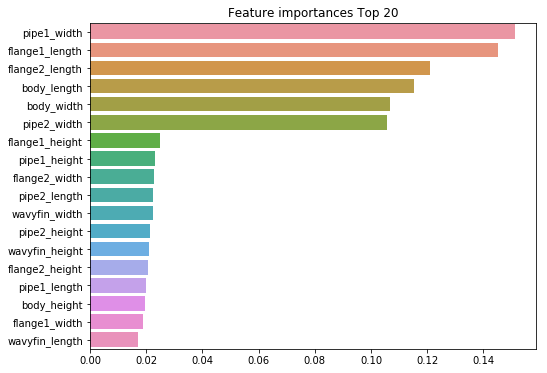

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x = ftr_top20 , y = ftr_top20.index)
plt.show()